# Test Resolution

In [2]:
import os
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

In [3]:
root = '/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/images'

In [4]:
l = []
path_l = []
for subdir, dirs, files in os.walk(root):
    for file in files:
        file_path = os.path.join(subdir, file)
        path_l.append(file_path)

for path in tqdm(path_l):
    try:
        with Image.open(path) as img:
            width, height = img.size
            l.append([width, height])
    except IOError:
        continue

100%|██████████| 11789/11789 [00:02<00:00, 5805.90it/s]


# Test Download

In [4]:
import gdown

file_list = [
    # File ID                   MD5 Hash (optional)    Filename
    ("1AUzo7HtqdFh0QDoGYH4WMrEZ-AoilvBJ", None, "images.txt"),
]

def download_files(file_list):
    base_url = "https://drive.google.com/uc?id="
    for file_id, md5, filename in file_list:
        url = base_url + file_id
        gdown.download(url, filename, quiet=False)

download_files(file_list)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1AUzo7HtqdFh0QDoGYH4WMrEZ-AoilvBJ
From (redirected): https://drive.google.com/uc?id=1AUzo7HtqdFh0QDoGYH4WMrEZ-AoilvBJ&confirm=t&uuid=812157d9-0219-49c2-b03d-986faf1c0eaf
To: /Users/queen/Desktop/Research/DP-diff/datasets/images.txt
100%|██████████| 1.14G/1.14G [00:22<00:00, 51.5MB/s]


# Test Splits

## CUB

In [5]:
file_path = '/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/train_test_split.txt'
l = []
with open(file_path, 'r') as file:
    for line in file:
        l.append(line.strip())
l = [i.split() for i in l]
l = [[int(i[0]), int(i[1])] for i in l]
from collections import Counter
l_ = [i[1] for i in l]
counts = Counter(l_)
counts

Counter({0: 5794, 1: 5994})

## Celeba

In [6]:
file_path = '/Users/queen/Desktop/Research/DP-diff/logs/exp_celeba/datasets/celeba/celeba/list_eval_partition.txt'
l = []
with open(file_path, 'r') as file:
    for line in file:
        l.append(line.strip())
l = [i.split() for i in l]
l = [[i[0], int(i[1])] for i in l]
from collections import Counter
l_ = [i[1] for i in l]
counts = Counter(l_)
counts

Counter({0: 162770, 1: 19867, 2: 19962})

## Create Split file for CUB

In [7]:
# get files path
file_l = []
file_path = '/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/images.txt'
with open(file_path, 'r') as file:
    for line in file:
        file_name = line.strip().split()[1]
        file_l.append(file_name)
file_l[-10:]

['200.Common_Yellowthroat/Common_Yellowthroat_0070_190678.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0040_190427.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0098_190430.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0094_190690.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0063_190440.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0037_190698.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0058_190958.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0008_190703.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0049_190708.jpg',
 '200.Common_Yellowthroat/Common_Yellowthroat_0055_190967.jpg']

In [8]:
import random
file_path = '/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/my_train_test_split.txt'
with open(file_path, 'w') as file:
    for i in range(1, 11789):
        if random.random() >= 0.9:
            split = 1 # test
        else:
            split = 0 # train 
        line = f'{file_l[i-1]} {split}\n'
        file.write(line)

In [9]:
file_path = '/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/my_train_test_split.txt'
l = []
with open(file_path, 'r') as file:
    for line in file:
        l.append(line.strip())
l = [i.split() for i in l]
l = [[str(i[0]), int(i[1])] for i in l]
from collections import Counter
l_ = [i[1] for i in l]
counts = Counter(l_)
counts

Counter({0: 10566, 1: 1222})

# Testing Bounding Box

In [10]:
# get file list
file_path = '/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/images.txt'
img_l = []
with open(file_path, 'r') as file:
    for line in file:
        img_l.append(line.strip().split())
img_l[:10]

[['1', '001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg'],
 ['2', '001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg'],
 ['3', '001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg'],
 ['4', '001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg'],
 ['5', '001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg'],
 ['6', '001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg'],
 ['7', '001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg'],
 ['8', '001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg'],
 ['9', '001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg'],
 ['10', '001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg']]

In [11]:
# get bbox list
file_path = '/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'
bbox_l = []
with open(file_path, 'r') as file:
    for line in file:
        bbox_l.append(line.strip().split())
bbox_l[:10]

[['1', '60.0', '27.0', '325.0', '304.0'],
 ['2', '139.0', '30.0', '153.0', '264.0'],
 ['3', '14.0', '112.0', '388.0', '186.0'],
 ['4', '112.0', '90.0', '255.0', '242.0'],
 ['5', '70.0', '50.0', '134.0', '303.0'],
 ['6', '33.0', '53.0', '251.0', '395.0'],
 ['7', '7.0', '75.0', '420.0', '262.0'],
 ['8', '78.0', '86.0', '333.0', '158.0'],
 ['9', '112.0', '76.0', '221.0', '189.0'],
 ['10', '27.0', '4.0', '199.0', '201.0']]

2941


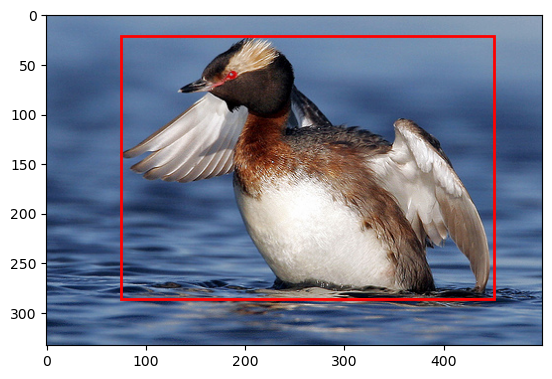

3054


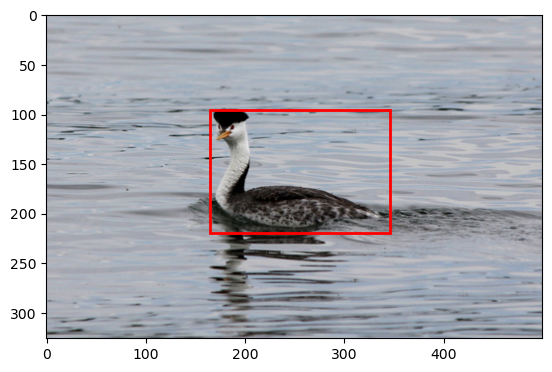

4495


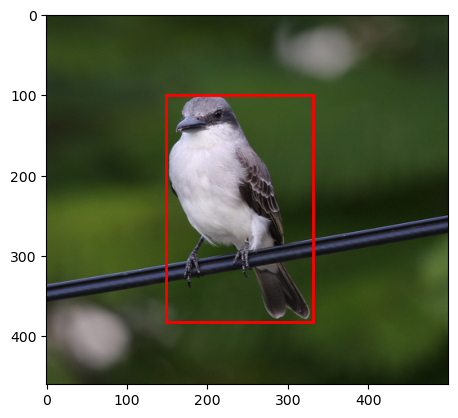

7012


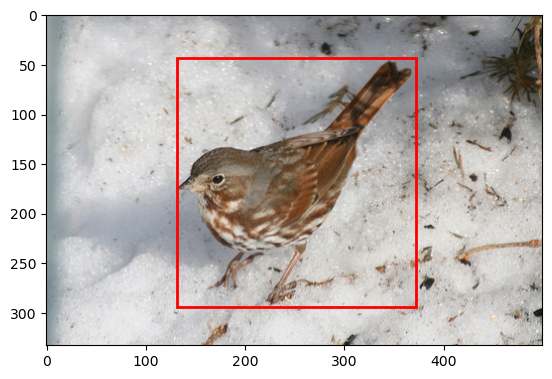

7153


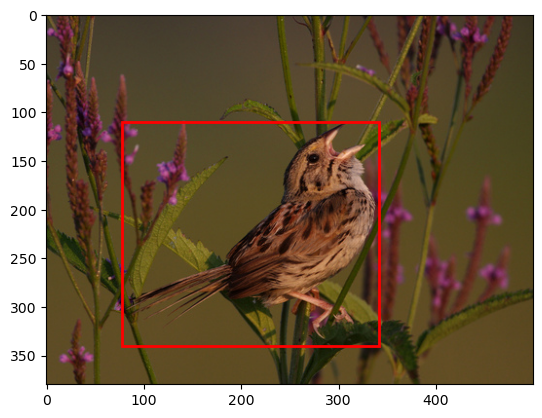

7778


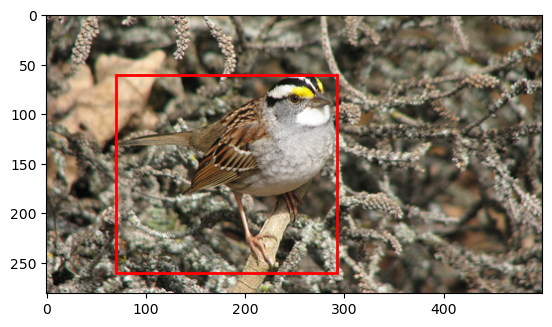

8704


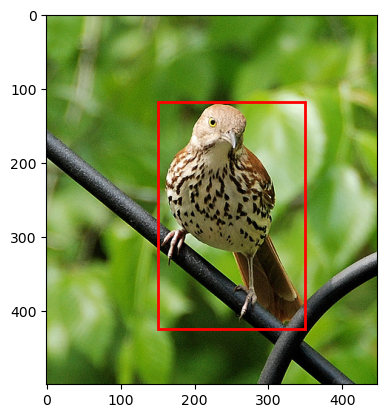

In [49]:
for index in range(10000):
    if random.random() < 0.001:
        print(index)
        image_path = os.path.join('/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/images', img_l[index][1])  # Replace with the actual path to your image
        image = cv2.imread(image_path)
        
        bbox = [float(i) for i in bbox_l[index]]
        _, x, y, width, height = bbox
        
        # Calculate the coordinates of the corners
        x_min, y_min = x, y
        x_max, y_max = x + width, y + height
        
        # Create a figure and axis
        fig, ax = plt.subplots(1)
        
        # Display the image
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        # Create a Rectangle patch
        bbox_ = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        
        # Add the bounding box to the plot
        ax.add_patch(bbox_)
        
        # Show the plot with the bounding box
        plt.show()

# Recenter Images

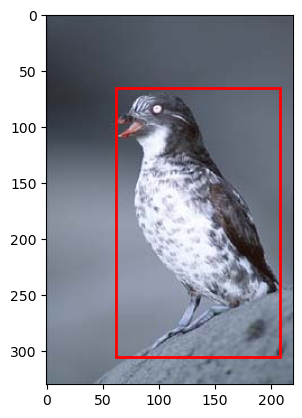

In [50]:
index = 302
image_path = os.path.join('/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/images', img_l[index][1])  # Replace with the actual path to your image
image = cv2.imread(image_path)

bbox = [float(i) for i in bbox_l[index]]
_, x, y, width, height = bbox

# Calculate the coordinates of the corners
x_min, y_min = x, y
x_max, y_max = x + width, y + height

# Create a figure and axis
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Create a Rectangle patch
bbox_ = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')

# Add the bounding box to the plot
ax.add_patch(bbox_)

# Show the plot with the bounding box
plt.show()

In [70]:
def recenter_images(image, bbox):
    img_height, img_width, _ = image.shape
    #print(image.shape)
    
    _, x, y, width, height = bbox
    square_length = max(width, height)
        
    # Calculate the coordinates of the corners
    x_center = x + width/2
    y_center = y + height/2
    x_min, y_min = x_center-square_length/2, y_center-square_length/2
    x_max, y_max = x_center+square_length/2, y_center+square_length/2
    
    # recenter
    if x_max > img_width:
        x_max = img_width
        x_min = img_width - square_length
    
    if y_max > img_height:
        y_max = img_height
        y_min = img_height - square_length
    
    # crop the image
    y_min = max(int(y_min), 0)
    y_max = min(int(y_max), img_height)
    x_min = max(int(x_min), 0)
    x_max = min(int(x_max), img_width)
    image = image[y_min:y_max, x_min:x_max]
    
    # fill the blank to make it square
    img_height, img_width, _ = image.shape
    delta = abs(img_height - img_width)

    # Pad the image with white pixels to make it square
    if height > width:
        # If the height is greater, pad the sides
        left_pad = delta // 2
        right_pad = delta - left_pad
        image = cv2.copyMakeBorder(image, 0, 0, left_pad, right_pad, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    elif width > height:
        # If the width is greater, pad the top and bottom
        top_pad = delta // 2
        bottom_pad = delta - top_pad
        image = cv2.copyMakeBorder(image, top_pad, bottom_pad, 0, 0, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    
    #fig, ax = plt.subplots(1)
    #ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #plt.show()
    return image

#recenter_images(image, bbox)

In [71]:
for index in tqdm(range(len(img_l))):
    image_path = os.path.join('/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/images', img_l[index][1])  # Replace with the actual path to your image
    image = cv2.imread(image_path)
        
    bbox = [float(i) for i in bbox_l[index]]
    _, x, y, width, height = bbox
        
    image = recenter_images(image, bbox)
    cv2.imwrite(image_path, image)

100%|██████████| 11788/11788 [00:30<00:00, 390.30it/s]


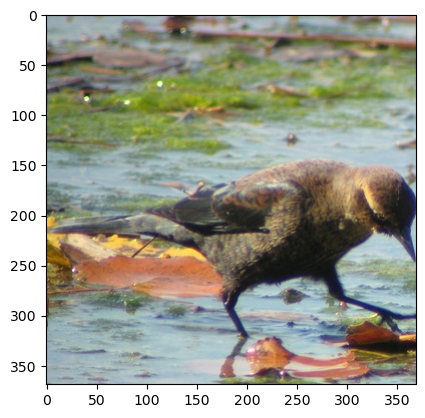

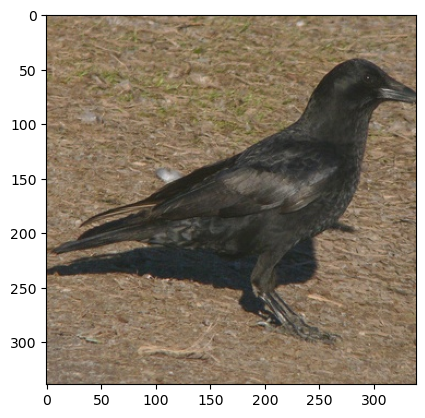

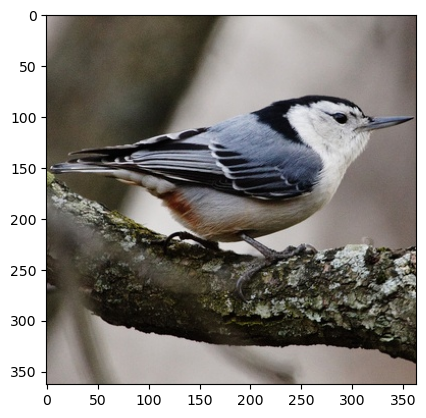

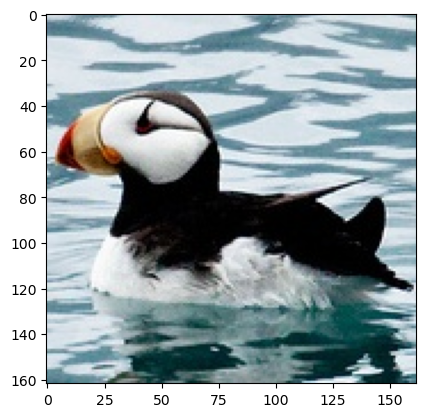

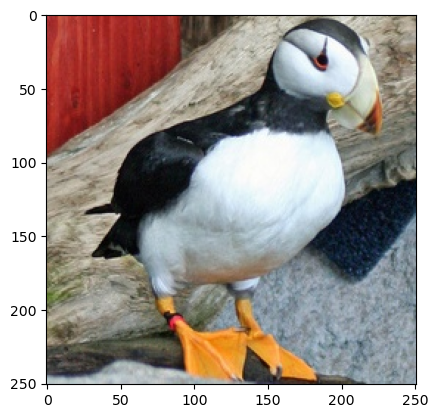

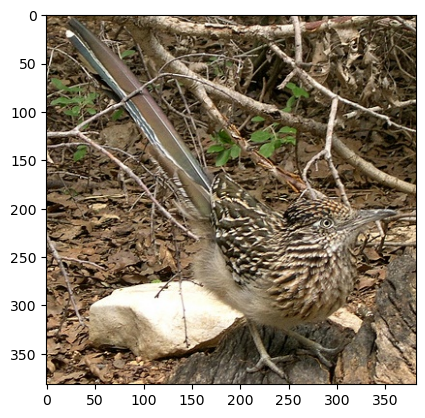

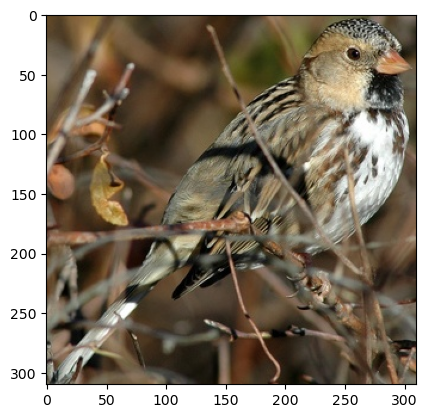

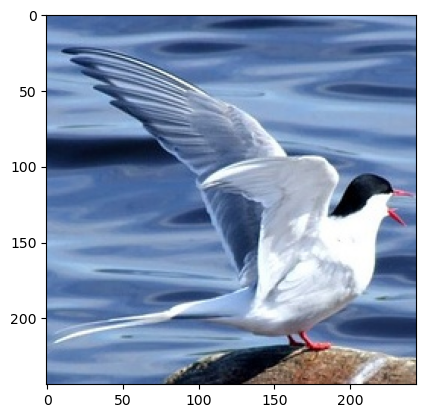

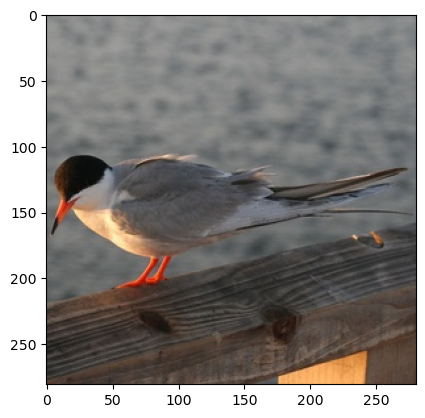

In [73]:
for index in range(len(img_l)):
    if random.random() < 0.001:
        image_path = os.path.join('/Users/queen/Desktop/Research/DP-diff/datasets/CUB_200_2011/CUB_200_2011/images', img_l[index][1])  # Replace with the actual path to your image
        image = cv2.imread(image_path)
        
        fig, ax = plt.subplots(1)
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))